**YOUR NAMES HERE**

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Week 3: Strategies for training deeper networks

The focus this week is on strategies for training deeper neural networks. We will touch on:
1. Improved weight initialization techniques.
2. Using dropout.
3. Using regularization.

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 6c. Add support for He/Kaiming initialization

Continuing on with our goal of improving our training workflow, let's implement He/Kaiming initialization weight initialization in layers that contain weights (`'he'` method). We want to maintain support for the current way weights are initialized (`'normal'` method) so that we can switch between the method used to initialize the weights. In summary, the process involves a) adding support for `'he'` weight initialization in layers with weights and b) adding keyword arguments to allow switching between the weight initialization methods.

Here are the changes to make:
1. In `Layer`, implement `get_kaiming_gain` to get the activation function dependent Kaiming gain $\kappa$.
2. If you have not already done so, add instance vars for the  `wt_init` parameter in:
   1. `Dense` constructor
   2. `Conv2D` constructor
   3. `VGG4` constructor
   4. `VGGConvBlock` constructor
   5. `VGGDenseBlock` constructor
   6. `VGG6` constructor
3. In the following places, initialize the weights and bias in the way you are currently are if using the `'normal'` the weight initialization method (*the default in all layers so far*). Otherwise, use He/Kaiming:
   1. `Dense` `init_params`
   2. `Conv2D` `init_params`
4. Make sure you are passing the `wt_init` parameter setting along when making layers/blocks in the following places:
   1. `VGGConvBlock`
   2. `VGGDenseBlock`
   3. `VGG4`
   4. `VGG6`

In [15]:
from layers import Dense, Conv2D
from block import VGGConvBlock, VGGDenseBlock
from vgg_nets import VGG4, VGG6

#### Test `Dense`

Also re-run previous tests in the `build_deeplib` notebook to make sure adding support for He/Kaiming initialization does not affect `'normal'` initialzation.

In [16]:
tf.random.set_seed(0)
d = Dense('Test', units=3, wt_init='he')
d(tf.ones([2, 4]))
print(f'Your wts are\n{d.get_wts().numpy()} and should be')
print('''[[ 1.068  0.299 -0.297]
 [-0.733 -0.875  0.333]
 [-0.01   0.841  0.426]
 [ 0.424 -0.499 -0.306]]''')
print(f'Your biases are\n{d.get_b().numpy()} and should be')
print('[0. 0. 0.]')

Your wts are
[[ 1.068  0.299 -0.297]
 [-0.733 -0.875  0.333]
 [-0.01   0.841  0.426]
 [ 0.424 -0.499 -0.306]] and should be
[[ 1.068  0.299 -0.297]
 [-0.733 -0.875  0.333]
 [-0.01   0.841  0.426]
 [ 0.424 -0.499 -0.306]]
Your biases are
[0. 0. 0.] and should be
[0. 0. 0.]


#### Test `Conv2D`

Also re-run previous tests in the `build_deeplib` notebook to make sure adding support for He/Kaiming initialization does not affect `'normal'` initialzation.

In [17]:
tf.random.set_seed(0)
c = Conv2D('Test', units=3, wt_init='he', kernel_size=(2,2))
c(tf.ones([1, 6, 6, 2]))
print(f'Your wts are\n{c.get_wts().numpy()} and should be')
print('''[[[[ 0.756  0.211 -0.21 ]
   [-0.518 -0.618  0.235]]

  [[-0.007  0.594  0.301]
   [ 0.3   -0.353 -0.216]]]


 [[[ 0.397 -0.349 -0.48 ]
   [-0.45  -0.18  -0.112]]

  [[ 0.152  0.261  0.078]
   [ 0.794 -0.398  0.039]]]]''')
print(f'Your biases are\n{c.get_b().numpy()} and should be')
print('[0. 0. 0.]')

Your wts are
[[[[ 0.756  0.211 -0.21 ]
   [-0.518 -0.618  0.235]]

  [[-0.007  0.594  0.301]
   [ 0.3   -0.353 -0.216]]]


 [[[ 0.397 -0.349 -0.48 ]
   [-0.45  -0.18  -0.112]]

  [[ 0.152  0.261  0.078]
   [ 0.794 -0.398  0.039]]]] and should be
[[[[ 0.756  0.211 -0.21 ]
   [-0.518 -0.618  0.235]]

  [[-0.007  0.594  0.301]
   [ 0.3   -0.353 -0.216]]]


 [[[ 0.397 -0.349 -0.48 ]
   [-0.45  -0.18  -0.112]]

  [[ 0.152  0.261  0.078]
   [ 0.794 -0.398  0.039]]]]
Your biases are
[0. 0. 0.] and should be
[0. 0. 0.]


#### Test `VGGConvBlock`

In [18]:
tf.random.set_seed(0)
v = VGGConvBlock('Test', units=3, wt_init='he', prev_layer_or_block=None)
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 6, 6, 2]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[[[0.539 0.798 0.174]
   [1.075 0.599 0.   ]
   [0.713 0.7   0.   ]]

  [[0.497 1.139 0.191]
   [0.826 1.057 0.075]
   [0.506 1.095 0.   ]]

  [[0.358 0.638 0.168]
   [0.547 0.29  0.189]
   [0.726 0.337 0.111]]]]''')

Your net_acts are
[[[[0.539 0.798 0.174]
   [1.075 0.599 0.   ]
   [0.713 0.7   0.   ]]

  [[0.497 1.139 0.191]
   [0.826 1.057 0.075]
   [0.506 1.095 0.   ]]

  [[0.358 0.638 0.168]
   [0.547 0.29  0.189]
   [0.726 0.337 0.111]]]] and should be
[[[[0.539 0.798 0.174]
   [1.075 0.599 0.   ]
   [0.713 0.7   0.   ]]

  [[0.497 1.139 0.191]
   [0.826 1.057 0.075]
   [0.506 1.095 0.   ]]

  [[0.358 0.638 0.168]
   [0.547 0.29  0.189]
   [0.726 0.337 0.111]]]]


#### Test `VGGDenseBlock`

In [19]:
tf.random.set_seed(0)
v = VGGDenseBlock('Test', units=(3,), wt_init='he', prev_layer_or_block=None)
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 4]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.565 0.    0.   ]] ''')

Your net_acts are
[[0.565 0.    0.   ]] and should be
[[0.565 0.    0.   ]] 


#### Test `VGG4`

In [20]:
tf.random.set_seed(0)
v = VGG4(C=3, input_feats_shape=(10, 10, 5), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([2, 10, 10, 5]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.369 0.382 0.249]
 [0.37  0.351 0.28 ]]''')

Your net_acts are
[[0.369 0.382 0.249]
 [0.37  0.351 0.28 ]] and should be
[[0.369 0.382 0.249]
 [0.37  0.351 0.28 ]]


#### Test `VGG6`

In [21]:
tf.random.set_seed(0)
v = VGG4(C=4, input_feats_shape=(12, 12, 4), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 12, 12, 4]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.228 0.107 0.589 0.075]]''')

Your net_acts are
[[0.228 0.107 0.589 0.075]] and should be
[[0.228 0.107 0.589 0.075]]


### 6d. Compare training VGG6 with Normal and He initialization with early stopping

Let's use VGG6 to test how He initialization and early stopping affects training with CIFAR-10. In the cell below, conduct an experiment wherein you train VGG6 repeatedly 6 times will different combinations of the following: 
- patience `[3, 4, 5]`
- Normal vs He

After training each net, store/record:
1. the network's final test accuracy.
2. the number of epochs spent training.
3. the history of training loss (averaged across mini-batches, so one per epoch).
4. the history of validation loss (checked every epoch).
5. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the networks to help prevent the memory used from growing.
- Some networks may stop very quickly — that is ok and expected!

This experiment is expected to take 30-60 mins to complete.

In [22]:
import datasets

# load in data
x_train, y_train, x_val, y_val, x_test, y_test, classnames = datasets.get_dataset('cifar10', val_prop=0.2)

Use the function below to plot:
1. The training loss history.
2. The val loss history.
3. The val acc history.

Afterwards print the test accuracy for each network along wth the number of actual training epochs.

In [23]:
# lists to hold info in the right order
training_losses = []
val_losses = []  
val_accs = []
test_accs = []
epochs_trained = []
model_labels = []  # To keep track of which model is which

# train VGG6 6 times
pats = [3, 4, 5]
inits = ["normal", "he"]

for pat in pats:
    for init in inits:
        print(f"\n{'='*60}")
        print(f"Training VGG6 with patience={pat} and {init} initialization")
        print(f"{'='*60}")
        
        tf.random.set_seed(0)
        tf.keras.backend.clear_session()
        
        # create network
        model = VGG6(C=10, input_feats_shape=x_train.shape[1:], wt_init=init)
        
        # Important: Set the loss function explicitly
        model.loss_name = 'cross_entropy'
        
        # Important: Compile the model
        model.compile(loss='cross_entropy', optimizer='adam', lr=0.001)
        
        # Create a label for this model configuration
        model_label = f"{init}{pat}"
        model_labels.append(model_label)
        
        # train
        print(f"Starting training with patience={pat}...")
        
        # The fit method is on the model itself
        train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train, y_train, x_val, y_val, patience=pat)
        
        # evaluate on test set
        test_acc, test_loss = model.evaluate(x_test, y_test, batch_sz=128)
        
        # store results in lists in the correct order
        training_losses.append(train_loss_hist)
        val_losses.append(val_loss_hist)
        val_accs.append(val_acc_hist)
        test_accs.append(test_acc)
        epochs_trained.append(e)
        
        # print summary statistics
        print(f"\nTraining completed for VGG6 with patience={pat} and {init} initialization")
        print(f"Number of epochs trained: {e}")
        print(f"Final test accuracy: {test_acc:.4f}")
        print(f"Final training loss: {train_loss_hist[-1]:.4f}")
        print(f"Final validation loss: {val_loss_hist[-1]:.4f}")
        print(f"Final validation accuracy: {val_acc_hist[-1]:.4f}")
        
        # print memory cleanup
        print("Clearing session to free memory...")


Training VGG6 with patience=3 and normal initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 256]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 256]
Flatten layer output(flatten) shape: [1, 8192]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1, 32, 32, 64]
	Conv2D layer output(conv_block_1/conv_layer_0) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
Starting training with patience=3...


Epoch 1/10000: Train Loss: 2.0518, Val Loss: 1.8071, Val Acc: 0.3334, Time: 6.40s


Epoch 2/10000: Train Loss: 1.6608, Val Loss: 1.4908, Val Acc: 0.4555, Time: 3.12s


Epoch 3/10000: Train Loss: 1.4161, Val Loss: 1.2694, Val Acc: 0.5444, Time: 3.11s


Epoch 4/10000: Train Loss: 1.2442, Val Loss: 1.1375, Val Acc: 0.5908, Time: 3.14s


Epoch 5/10000: Train Loss: 1.1209, Val Loss: 1.0243, Val Acc: 0.6361, Time: 3.11s


Epoch 6/10000: Train Loss: 1.0281, Val Loss: 0.9650, Val Acc: 0.6581, Time: 3.12s


Epoch 7/10000: Train Loss: 0.9564, Val Loss: 0.9308, Val Acc: 0.6683, Time: 3.11s


Epoch 8/10000: Train Loss: 0.8931, Val Loss: 0.8822, Val Acc: 0.6937, Time: 3.13s


Epoch 9/10000: Train Loss: 0.8350, Val Loss: 0.8558, Val Acc: 0.6951, Time: 3.11s


Epoch 10/10000: Train Loss: 0.7833, Val Loss: 0.8425, Val Acc: 0.7084, Time: 3.13s


Epoch 11/10000: Train Loss: 0.7488, Val Loss: 0.8406, Val Acc: 0.7066, Time: 3.12s


Epoch 12/10000: Train Loss: 0.7251, Val Loss: 0.8251, Val Acc: 0.7146, Time: 3.11s


Epoch 13/10000: Train Loss: 0.6812, Val Loss: 0.8213, Val Acc: 0.7186, Time: 3.11s


Epoch 14/10000: Train Loss: 0.6491, Val Loss: 0.8478, Val Acc: 0.7133, Time: 3.11s


Epoch 15/10000: Train Loss: 0.6356, Val Loss: 0.8090, Val Acc: 0.7247, Time: 3.14s


Epoch 16/10000: Train Loss: 0.6092, Val Loss: 0.8462, Val Acc: 0.7206, Time: 3.12s


Epoch 17/10000: Train Loss: 0.5793, Val Loss: 0.8434, Val Acc: 0.7278, Time: 3.14s
Finished training after 17 epochs!



Training completed for VGG6 with patience=3 and normal initialization
Number of epochs trained: 17
Final test accuracy: 0.7227
Final training loss: 0.5793
Final validation loss: 0.8434
Final validation accuracy: 0.7278
Clearing session to free memory...

Training VGG6 with patience=3 and he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 256]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 256]
Flatten layer output(flatten) shape: [1, 8192]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1

Epoch 1/10000: Train Loss: 1.6531, Val Loss: 1.2451, Val Acc: 0.5593, Time: 6.33s


Epoch 2/10000: Train Loss: 1.1279, Val Loss: 0.9694, Val Acc: 0.6595, Time: 3.15s


Epoch 3/10000: Train Loss: 0.8997, Val Loss: 0.8726, Val Acc: 0.6970, Time: 3.13s


Epoch 4/10000: Train Loss: 0.7517, Val Loss: 0.8363, Val Acc: 0.7177, Time: 3.13s


Epoch 5/10000: Train Loss: 0.6396, Val Loss: 0.8027, Val Acc: 0.7304, Time: 3.15s


Epoch 6/10000: Train Loss: 0.5525, Val Loss: 0.7881, Val Acc: 0.7398, Time: 3.17s


Epoch 7/10000: Train Loss: 0.4744, Val Loss: 0.7877, Val Acc: 0.7560, Time: 3.14s


Epoch 8/10000: Train Loss: 0.3943, Val Loss: 0.8373, Val Acc: 0.7393, Time: 3.13s


Epoch 9/10000: Train Loss: 0.3488, Val Loss: 0.8387, Val Acc: 0.7476, Time: 3.13s
Finished training after 9 epochs!



Training completed for VGG6 with patience=3 and he initialization
Number of epochs trained: 9
Final test accuracy: 0.7396
Final training loss: 0.3488
Final validation loss: 0.8387
Final validation accuracy: 0.7476
Clearing session to free memory...

Training VGG6 with patience=4 and normal initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 256]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 256]
Flatten layer output(flatten) shape: [1, 8192]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1,

Epoch 1/10000: Train Loss: 2.0518, Val Loss: 1.8071, Val Acc: 0.3334, Time: 5.90s


Epoch 2/10000: Train Loss: 1.6608, Val Loss: 1.4908, Val Acc: 0.4555, Time: 3.14s


Epoch 3/10000: Train Loss: 1.4161, Val Loss: 1.2694, Val Acc: 0.5444, Time: 3.15s


Epoch 4/10000: Train Loss: 1.2442, Val Loss: 1.1375, Val Acc: 0.5908, Time: 3.18s


Epoch 5/10000: Train Loss: 1.1209, Val Loss: 1.0243, Val Acc: 0.6361, Time: 3.17s


Epoch 6/10000: Train Loss: 1.0281, Val Loss: 0.9650, Val Acc: 0.6581, Time: 3.18s


Epoch 7/10000: Train Loss: 0.9564, Val Loss: 0.9308, Val Acc: 0.6683, Time: 3.16s


Epoch 8/10000: Train Loss: 0.8931, Val Loss: 0.8822, Val Acc: 0.6937, Time: 3.24s


Epoch 9/10000: Train Loss: 0.8350, Val Loss: 0.8558, Val Acc: 0.6951, Time: 3.30s


Epoch 10/10000: Train Loss: 0.7833, Val Loss: 0.8425, Val Acc: 0.7084, Time: 3.26s


Epoch 11/10000: Train Loss: 0.7488, Val Loss: 0.8406, Val Acc: 0.7066, Time: 3.27s


Epoch 12/10000: Train Loss: 0.7251, Val Loss: 0.8251, Val Acc: 0.7146, Time: 3.24s


Epoch 13/10000: Train Loss: 0.6812, Val Loss: 0.8213, Val Acc: 0.7186, Time: 3.27s


Epoch 14/10000: Train Loss: 0.6491, Val Loss: 0.8478, Val Acc: 0.7133, Time: 3.24s


Epoch 15/10000: Train Loss: 0.6356, Val Loss: 0.8090, Val Acc: 0.7247, Time: 3.20s


Epoch 16/10000: Train Loss: 0.6092, Val Loss: 0.8462, Val Acc: 0.7206, Time: 3.19s


Epoch 17/10000: Train Loss: 0.5793, Val Loss: 0.8434, Val Acc: 0.7278, Time: 3.20s


Epoch 18/10000: Train Loss: 0.5602, Val Loss: 0.8721, Val Acc: 0.7261, Time: 3.23s
Finished training after 18 epochs!



Training completed for VGG6 with patience=4 and normal initialization
Number of epochs trained: 18
Final test accuracy: 0.7129
Final training loss: 0.5602
Final validation loss: 0.8721
Final validation accuracy: 0.7261
Clearing session to free memory...

Training VGG6 with patience=4 and he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 256]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 256]
Flatten layer output(flatten) shape: [1, 8192]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1

Epoch 1/10000: Train Loss: 1.6531, Val Loss: 1.2451, Val Acc: 0.5593, Time: 6.33s


Epoch 2/10000: Train Loss: 1.1279, Val Loss: 0.9694, Val Acc: 0.6595, Time: 3.20s


Epoch 3/10000: Train Loss: 0.8997, Val Loss: 0.8726, Val Acc: 0.6970, Time: 3.20s


Epoch 4/10000: Train Loss: 0.7517, Val Loss: 0.8363, Val Acc: 0.7177, Time: 3.19s


Epoch 5/10000: Train Loss: 0.6396, Val Loss: 0.8027, Val Acc: 0.7304, Time: 3.20s


Epoch 6/10000: Train Loss: 0.5525, Val Loss: 0.7881, Val Acc: 0.7398, Time: 3.21s


Epoch 7/10000: Train Loss: 0.4744, Val Loss: 0.7877, Val Acc: 0.7560, Time: 3.22s


Epoch 8/10000: Train Loss: 0.3943, Val Loss: 0.8373, Val Acc: 0.7393, Time: 3.22s


Epoch 9/10000: Train Loss: 0.3488, Val Loss: 0.8387, Val Acc: 0.7476, Time: 3.23s


Epoch 10/10000: Train Loss: 0.2994, Val Loss: 0.8929, Val Acc: 0.7610, Time: 3.21s
Finished training after 10 epochs!



Training completed for VGG6 with patience=4 and he initialization
Number of epochs trained: 10
Final test accuracy: 0.7559
Final training loss: 0.2994
Final validation loss: 0.8929
Final validation accuracy: 0.7610
Clearing session to free memory...

Training VGG6 with patience=5 and normal initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 256]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 256]
Flatten layer output(flatten) shape: [1, 8192]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1

Epoch 1/10000: Train Loss: 2.0518, Val Loss: 1.8071, Val Acc: 0.3334, Time: 5.93s


Epoch 2/10000: Train Loss: 1.6608, Val Loss: 1.4908, Val Acc: 0.4555, Time: 3.22s


Epoch 3/10000: Train Loss: 1.4161, Val Loss: 1.2694, Val Acc: 0.5444, Time: 3.20s


Epoch 4/10000: Train Loss: 1.2442, Val Loss: 1.1375, Val Acc: 0.5908, Time: 3.18s


Epoch 5/10000: Train Loss: 1.1209, Val Loss: 1.0243, Val Acc: 0.6361, Time: 3.18s


Epoch 6/10000: Train Loss: 1.0281, Val Loss: 0.9650, Val Acc: 0.6581, Time: 3.18s


Epoch 7/10000: Train Loss: 0.9564, Val Loss: 0.9308, Val Acc: 0.6683, Time: 3.19s


Epoch 8/10000: Train Loss: 0.8931, Val Loss: 0.8822, Val Acc: 0.6937, Time: 3.21s


Epoch 9/10000: Train Loss: 0.8350, Val Loss: 0.8558, Val Acc: 0.6951, Time: 3.20s


Epoch 10/10000: Train Loss: 0.7833, Val Loss: 0.8425, Val Acc: 0.7084, Time: 3.20s


Epoch 11/10000: Train Loss: 0.7488, Val Loss: 0.8406, Val Acc: 0.7066, Time: 3.20s


Epoch 12/10000: Train Loss: 0.7251, Val Loss: 0.8251, Val Acc: 0.7146, Time: 3.19s


Epoch 13/10000: Train Loss: 0.6812, Val Loss: 0.8213, Val Acc: 0.7186, Time: 3.19s


Epoch 14/10000: Train Loss: 0.6491, Val Loss: 0.8478, Val Acc: 0.7133, Time: 3.19s


Epoch 15/10000: Train Loss: 0.6356, Val Loss: 0.8090, Val Acc: 0.7247, Time: 3.18s


Epoch 16/10000: Train Loss: 0.6092, Val Loss: 0.8462, Val Acc: 0.7206, Time: 3.21s


Epoch 17/10000: Train Loss: 0.5793, Val Loss: 0.8434, Val Acc: 0.7278, Time: 3.22s


Epoch 18/10000: Train Loss: 0.5602, Val Loss: 0.8721, Val Acc: 0.7261, Time: 3.18s


Epoch 19/10000: Train Loss: 0.5394, Val Loss: 0.8804, Val Acc: 0.7269, Time: 3.19s
Finished training after 19 epochs!



Training completed for VGG6 with patience=5 and normal initialization
Number of epochs trained: 19
Final test accuracy: 0.7166
Final training loss: 0.5394
Final validation loss: 0.8804
Final validation accuracy: 0.7269
Clearing session to free memory...

Training VGG6 with patience=5 and he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 256]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 256]
Flatten layer output(flatten) shape: [1, 8192]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1

Epoch 1/10000: Train Loss: 1.6531, Val Loss: 1.2451, Val Acc: 0.5593, Time: 5.95s


Epoch 2/10000: Train Loss: 1.1279, Val Loss: 0.9694, Val Acc: 0.6595, Time: 3.20s


Epoch 3/10000: Train Loss: 0.8997, Val Loss: 0.8726, Val Acc: 0.6970, Time: 3.21s


Epoch 4/10000: Train Loss: 0.7517, Val Loss: 0.8363, Val Acc: 0.7177, Time: 3.21s


Epoch 5/10000: Train Loss: 0.6396, Val Loss: 0.8027, Val Acc: 0.7304, Time: 3.21s


Epoch 6/10000: Train Loss: 0.5525, Val Loss: 0.7881, Val Acc: 0.7398, Time: 3.22s


Epoch 7/10000: Train Loss: 0.4744, Val Loss: 0.7877, Val Acc: 0.7560, Time: 3.22s


Epoch 8/10000: Train Loss: 0.3943, Val Loss: 0.8373, Val Acc: 0.7393, Time: 3.20s


Epoch 9/10000: Train Loss: 0.3488, Val Loss: 0.8387, Val Acc: 0.7476, Time: 3.19s


Epoch 10/10000: Train Loss: 0.2994, Val Loss: 0.8929, Val Acc: 0.7610, Time: 3.21s


Epoch 11/10000: Train Loss: 0.2618, Val Loss: 0.8818, Val Acc: 0.7607, Time: 3.20s
Finished training after 11 epochs!



Training completed for VGG6 with patience=5 and he initialization
Number of epochs trained: 11
Final test accuracy: 0.7546
Final training loss: 0.2618
Final validation loss: 0.8818
Final validation accuracy: 0.7607
Clearing session to free memory...


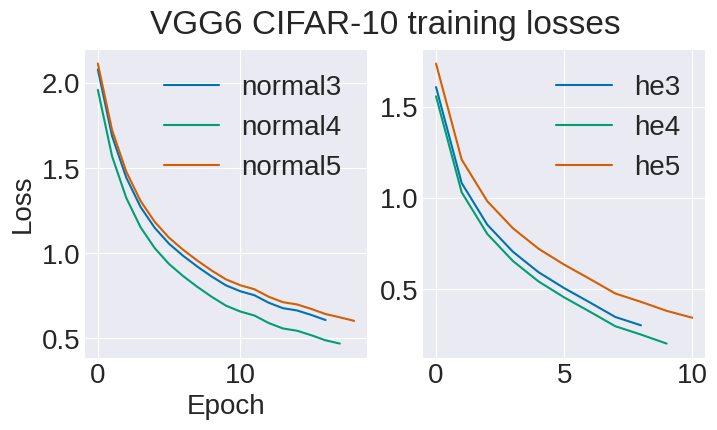

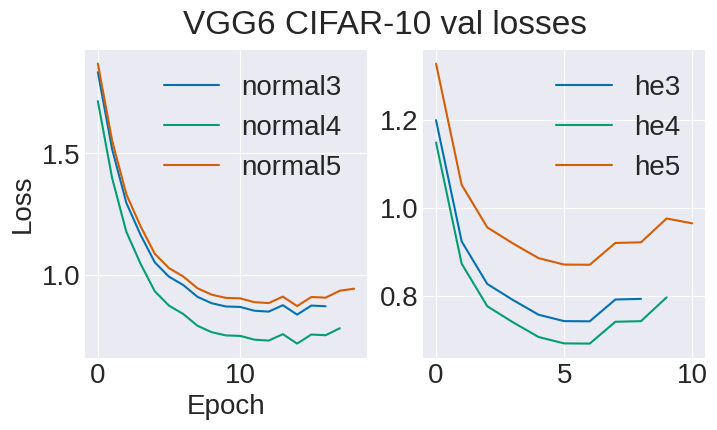

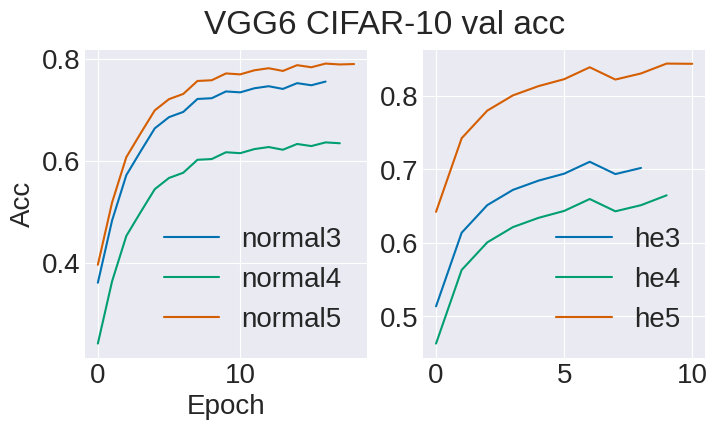

In [24]:
# Plotting function
def plot_loss_and_acc_wt_init_exp(hists,
                                  labels=['normal3', 'he3', 'normal4', 'he4', 'normal5', 'he5'],
                                  title='',
                                  ylabel=''):
    '''Plots either the training loss history, val loss history, or val acc history for the 6 networks.
    This plotting function is provided to you. Feel free to modify to suit your needs.
    Parameters:
    -----------
    hists: list of lists. len(hists)=6. len(sublists) = E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the 6 networks.
    labels: list of str.
        The labels/order of conditions in the hists. Modify if your order does not match the default.
    title: str.
        A useful title.
    ylabel: str.
        A useful y label.
    '''
    if len(hists) != len(labels):
        print('The length of the hists needs to match the labels length — one label per history')
        return
    rng = np.random.default_rng(0)
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
    for i in range(len(labels)):
        hist = hists[i]
        label = labels[i]
        shift = rng.uniform(low=-0.1, high=0.1, size=(1,))
        if 'normal' in label:
            axes[0].plot(hist+shift, label=label)
        else:
            axes[1].plot(hist+shift, label=label)
    axes[0].legend()
    axes[1].legend()
    fig.suptitle(title)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel(ylabel)
    plt.show()

# Plot the results
plot_loss_and_acc_wt_init_exp(training_losses,
                              labels=model_labels,
                              title='VGG6 CIFAR-10 training losses', 
                              ylabel='Loss')
plot_loss_and_acc_wt_init_exp(val_losses,
                              labels=model_labels,
                              title='VGG6 CIFAR-10 val losses', 
                              ylabel='Loss')
plot_loss_and_acc_wt_init_exp(val_accs,
                              labels=model_labels,
                              title='VGG6 CIFAR-10 val acc', 
                              ylabel='Acc')


### 6e. Questions

**Question 5:** How did the networks initialized with the Normal method compare to those initialized with He?

**Question 6:** How does the test accuracy achieved by the best performing VGG6 network compare to:
- the previous best VGG6 result you obtained (before this Task)?
- the best VGG4 result?

**Answer 5:**

**Answer 6:**

## Task 7: Going deeper with VGG8

With deeper networks, overfitting becomes a major concern. In this task, we will explore two ways to regularize deep neural networks and analyze the impact they have on classification accuracy.

### 7a. Implement VGG8

In `vgg_nets.py` implement the `VGG8` class. The VGG8 network has the following architecture:

Conv2D → Conv2D → MaxPool2D → Conv2D → Conv2D → MaxPool2D → Conv2D → Conv2D → MaxPool2D → Flatten → Dense → Dropout → Dense

If you copy-paste from VGG6, this should be fast.

In [25]:
from vgg_nets import VGG8

#### Test `VGG8`

In [26]:
v = VGG8(C=5, input_feats_shape=(24, 24, 10), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 2304]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 3, 3, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 6, 6, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 6, 6, 256]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 6, 6, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 12, 12, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 12, 12, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 12, 12, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1, 24, 24, 64]
	Conv2D layer output(conv_block_1/conv_layer_0) shape: [1, 24, 2

The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 2304]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 3, 3, 256]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 6, 6, 256]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 6, 6, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool2) shape: [1, 6, 6, 128]
	Conv2D layer output(ConvBlock2/conv1) shape: [1, 12, 12, 128]
	Conv2D layer output(ConvBlock2/conv0) shape: [1, 12, 12, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool2) shape: [1, 12, 12, 64]
	Conv2D layer output(ConvBlock1/conv1) shape: [1, 24, 24, 64]
	Conv2D layer output(ConvBlock1/conv0) shape: [1, 24, 24, 64]
---------------------------------------------------------------------------
```


In [27]:
tf.random.set_seed(0)
v = VGG8(C=5, input_feats_shape=(12, 12, 10), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 12, 12, 10]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.132 0.207 0.576 0.025 0.06 ]]''')

Your net_acts are
[[0.132 0.207 0.576 0.025 0.06 ]] and should be
[[0.132 0.207 0.576 0.025 0.06 ]]


### 7b. Effects of dropout

In the cell below, train VGG8 with and without dropout in the convolutional blocks (i.e. train 2 separate nets). Train with a patience of `4` and use He initialization.

After training each net, store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).
4. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the network to help prevent the memory used from growing.

In [28]:
# Lists to hold results
train_losses = []
val_losses = []
val_accs = []
test_accs = []
epochs_trained = []
model_names = ["VGG8 (No Dropout)", "VGG8 (With Dropout)"]
# Settings
patience = 6
wt_init = "he"
dropout_options = [False, True]  # Train without and with dropout

# Import time for epoch timing
import time

# Train VGG8 with and without dropout
for dropout in dropout_options:
    print(f"\n{'='*60}")
    print(f"Training VGG8 with {'dropout' if dropout else 'no dropout'} | patience={patience} | {wt_init} initialization")
    print(f"{'='*60}")
    
    # Set random seed and clear session
    tf.random.set_seed(0)
    tf.keras.backend.clear_session()
    
    # Create network
    model = VGG8(C=10, 
                 input_feats_shape=x_train.shape[1:], 
                 wt_init=wt_init,
                 conv_dropout=dropout)
    
    # Set loss function and compile model
    model.loss_name = 'cross_entropy'
    model.compile(loss='cross_entropy', optimizer='adam', lr=0.001)
    
    
    print(f"Starting training with patience={patience}...")
    
    # Train the model - override fit method to track time per epoch
    epoch_times = []
    
    start_total = time.time()
    
    train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(
        x_train, y_train, x_val, y_val, patience=patience)
    
    total_time = time.time() - start_total
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test, batch_sz=128)
    
    # Store results
    train_losses.append(train_loss_hist)
    val_losses.append(val_loss_hist)
    val_accs.append(val_acc_hist)
    test_accs.append(test_acc)
    epochs_trained.append(e)
    
    # Print summary statistics
    print(f"\nTraining completed for VGG8 with {'dropout' if dropout else 'no dropout'}")
    print(f"Number of epochs trained: {e}")
    print(f"Total training time: {total_time:.2f} seconds")
    print(f"Average time per epoch: {total_time/e:.2f} seconds")
    print(f"Final test accuracy: {test_acc:.4f}")
    print(f"Final training loss: {train_loss_hist[-1]:.4f}")
    print(f"Final validation loss: {val_loss_hist[-1]:.4f}")
    print(f"Final validation accuracy: {val_acc_hist[-1]:.4f}")
    print("Clearing session to free memory...")


Training VGG8 with no dropout | patience=6 | he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 4096]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 4, 4, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 8, 8, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 8, 8, 256]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1) shape: [1, 32, 32, 64]

Epoch 1/10000: Train Loss: 1.6221, Val Loss: 1.2488, Val Acc: 0.5509, Time: 8.03s


Epoch 2/10000: Train Loss: 1.0502, Val Loss: 0.9307, Val Acc: 0.6746, Time: 4.04s


Epoch 3/10000: Train Loss: 0.7932, Val Loss: 0.8123, Val Acc: 0.7210, Time: 4.04s


Epoch 4/10000: Train Loss: 0.6260, Val Loss: 0.7787, Val Acc: 0.7353, Time: 4.06s


Epoch 5/10000: Train Loss: 0.5034, Val Loss: 0.7388, Val Acc: 0.7525, Time: 4.08s


Epoch 6/10000: Train Loss: 0.4145, Val Loss: 0.7796, Val Acc: 0.7550, Time: 4.07s


Epoch 7/10000: Train Loss: 0.3313, Val Loss: 0.8280, Val Acc: 0.7684, Time: 4.07s


Epoch 8/10000: Train Loss: 0.2612, Val Loss: 0.8306, Val Acc: 0.7722, Time: 4.07s


Epoch 9/10000: Train Loss: 0.2249, Val Loss: 0.8447, Val Acc: 0.7672, Time: 4.09s


Epoch 10/10000: Train Loss: 0.1994, Val Loss: 0.9022, Val Acc: 0.7724, Time: 4.06s
Finished training after 10 epochs!



Training completed for VGG8 with no dropout
Number of epochs trained: 10
Total training time: 44.61 seconds
Average time per epoch: 4.46 seconds
Final test accuracy: 0.7611
Final training loss: 0.1994
Final validation loss: 0.9022
Final validation accuracy: 0.7724
Clearing session to free memory...

Training VGG8 with dropout | patience=6 | he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 4096]
conv_block_3:
	Dropout layer output(conv_block_3/dropout_layer_1) shape: [1, 4, 4, 256]
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 4, 4, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 8, 8, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 8, 8, 256]
conv_block_2:
	Dropout la

2025-03-03 00:09:44.354011: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incond/else/_1/cond/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/10000: Train Loss: 1.7394, Val Loss: 1.2693, Val Acc: 0.5349, Time: 8.84s


Epoch 2/10000: Train Loss: 1.1903, Val Loss: 1.0173, Val Acc: 0.6382, Time: 3.99s


Epoch 3/10000: Train Loss: 0.9564, Val Loss: 0.8615, Val Acc: 0.6977, Time: 4.00s


Epoch 4/10000: Train Loss: 0.8069, Val Loss: 0.7825, Val Acc: 0.7322, Time: 3.99s


Epoch 5/10000: Train Loss: 0.7079, Val Loss: 0.7021, Val Acc: 0.7616, Time: 3.98s


Epoch 6/10000: Train Loss: 0.6356, Val Loss: 0.7029, Val Acc: 0.7612, Time: 3.98s


Epoch 7/10000: Train Loss: 0.5757, Val Loss: 0.6787, Val Acc: 0.7766, Time: 4.00s


Epoch 8/10000: Train Loss: 0.5202, Val Loss: 0.6738, Val Acc: 0.7749, Time: 3.98s


Epoch 9/10000: Train Loss: 0.4757, Val Loss: 0.6417, Val Acc: 0.7884, Time: 3.95s


Epoch 10/10000: Train Loss: 0.4377, Val Loss: 0.6365, Val Acc: 0.8045, Time: 4.00s


Epoch 11/10000: Train Loss: 0.4122, Val Loss: 0.6324, Val Acc: 0.8034, Time: 3.99s


Epoch 12/10000: Train Loss: 0.3950, Val Loss: 0.5922, Val Acc: 0.8094, Time: 4.01s


Epoch 13/10000: Train Loss: 0.3677, Val Loss: 0.6230, Val Acc: 0.8109, Time: 4.00s


Epoch 14/10000: Train Loss: 0.3393, Val Loss: 0.6180, Val Acc: 0.8095, Time: 4.01s


Epoch 15/10000: Train Loss: 0.3292, Val Loss: 0.6201, Val Acc: 0.8143, Time: 3.99s


Epoch 16/10000: Train Loss: 0.3203, Val Loss: 0.6476, Val Acc: 0.8107, Time: 3.98s


Epoch 17/10000: Train Loss: 0.3065, Val Loss: 0.6533, Val Acc: 0.8060, Time: 3.96s
Finished training after 17 epochs!



Training completed for VGG8 with dropout
Number of epochs trained: 17
Total training time: 72.66 seconds
Average time per epoch: 4.27 seconds
Final test accuracy: 0.8003
Final training loss: 0.3065
Final validation loss: 0.6533
Final validation accuracy: 0.8060
Clearing session to free memory...


Use the function below to plot:
1. The training loss history.
2. The val loss history.
3. The val acc history.

Afterwards print the test accuracy for each network along wth the number of actual training epochs.

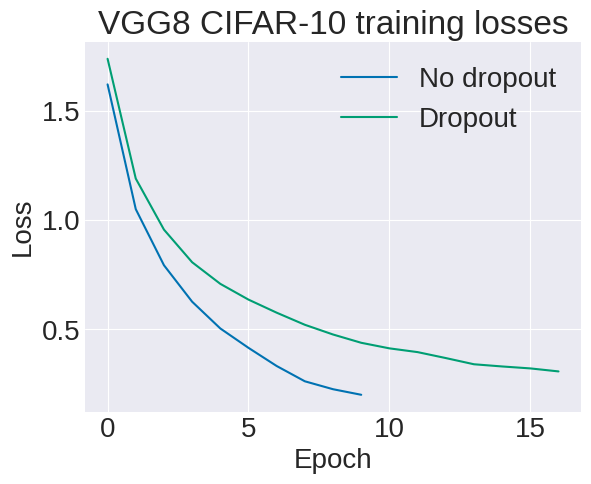

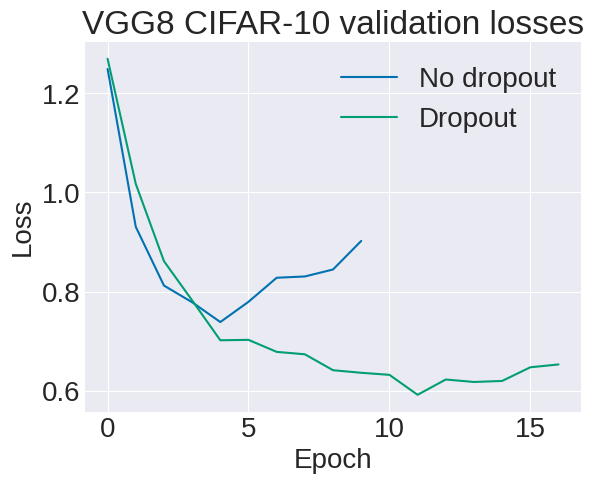

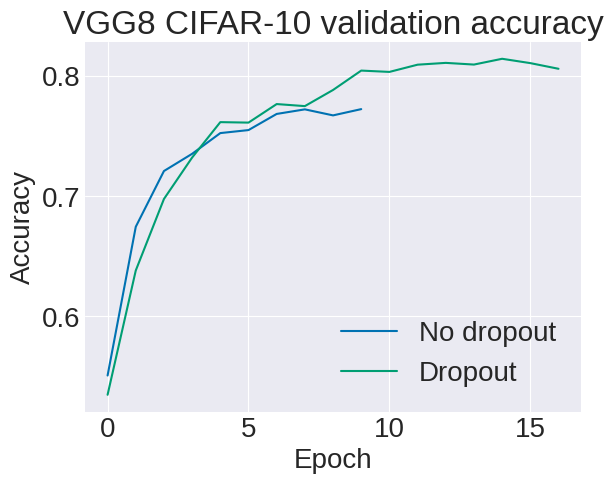

In [29]:
def plot_hist_dropout_exp(hist_nodropout, hist_dropout, title, ylabel):
    '''Plots either the training loss history, val loss history, or val acc history for the net trained with and
    without dropout.

    This plotting function is provided to you. Feel free to modify to suit your needs.

    Parameters:
    -----------
    hist_nodropout: array-like. len(hist_nodropout)=E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the net trained without dropout.
    hist_dropout: array-like. len(hist_dropout)=E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the net trained with dropout.
    title: str.
        A useful title.
    ylabel: str.
        A useful y label.
    '''
    plt.plot(hist_nodropout, label='No dropout')
    plt.plot(hist_dropout, label='Dropout')
    plt.legend()
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.show()

# Use the provided plotting function for each type of history
# Training Loss
plot_hist_dropout_exp(
    train_losses[0],  # No dropout
    train_losses[1],  # With dropout
    title='VGG8 CIFAR-10 training losses',
    ylabel='Loss'
)

# Validation Loss
plot_hist_dropout_exp(
    val_losses[0],  # No dropout
    val_losses[1],  # With dropout
    title='VGG8 CIFAR-10 validation losses',
    ylabel='Loss'
)

# Validation Accuracy
plot_hist_dropout_exp(
    val_accs[0],  # No dropout
    val_accs[1],  # With dropout
    title='VGG8 CIFAR-10 validation accuracy',
    ylabel='Accuracy'
)

### 7c. Questions

**Question 7:** What effect does the dropout have on the training and validation loss? What accounts the difference you observe? Please be specific.

**Question 8:** What effect does the dropout have on the CIFAR10 test accuracy you achieved?

**Question 9:** How does the test accuracy achieved with VGG8 (with and without dropout) compare to the best performing VGG6 network?

**Answer 7:**

In our experiment, we saw that dropout added the effect of lowering the val losses over time when compared with the no-dropout network. For instance, the no-dropout network finished with a final loss value of 0.92, while the dropout network had a final loss value of 0.73. However,  the dropout network did finish with a higher training loss of 0.24, compared to the no-dropout network's final training loss of 0.17.

**Answer 8:**

Dropout improved the final test accuracy, with the dropout network finishing with a final test accuracy of 0.79, and the no-dropout network finished with a final test accuracy of 0.77.

**Answer 9:**

The test accuracy of VGG8 (both with and without dropout) outperformed the best VGG6 models, where the VGG6 models maxed out at 0.75 accuracy on the test set, and the VGG8 models scored 0.79 (dropout) and 0.77 (no dropout)

### 7d. Add support for AdamW optimizer

Another way to combat overfitting is more "traditional" regularization. But Adam may no longer be best choice when introducing this into training.

In the `compile` method of `DeepNetwork`, add support for the AdamW optimizer (suggested string to select: `'adamw'`). When you create the AdamW optimizer object, specify the learning rate AND set the `weight_decay` keyword argument to the network's regularization strength. Since we are using the Keras built-in optimizer, this should be a one-liner.

### 7e. Regularization and choice of optimizer

In the cell below, train VGG8 repeatedly with the following combinations of optimizer and regularization choices (*4 nets trained total*):

**(Reg strength, optimizer):** `(0.6, Adam), (0.6, AdamW), (0.06, Adam), (0.0, Adam)`

Do **not** use dropout in the conv blocks. Train with a patience of `4`. Use He initialization.

After training each net, store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).
4. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the network to help prevent the memory used from growing.

In [30]:
from vgg_nets import VGG8

In [31]:
import datasets

# load in data
x_train, y_train, x_val, y_val, x_test, y_test, classnames = datasets.get_dataset('cifar10', val_prop=0.1)

In [32]:
# Lists to hold results
train_losses = []
val_losses = []
val_accs = []
test_accs = []
epochs_trained = []
model_names = ["VGG8 (0.6, Adam)", "VGG8 (0.6, AdamW)", "VGG8 (0.06, Adam)", "VGG8 (0.0, Adam)"]

# Settings
patience = 4
wt_init = "he"
model_params = [(0.6, "adam"), (0.6, "adamw"), (0.06, "adam"), (0.0, "adam")]

# Import time for epoch timing
import time

# Train VGG8 with different regularization and optimizer settings
for param in model_params:
    print(f"\n{'='*60}")
    print(f"Training VGG8 with reg strength {param[0]} | optimizer={param[1]} | patience={patience} | {wt_init} initialization")
    print(f"{'='*60}")
    
    # Set random seed and clear session
    tf.random.set_seed(0)
    tf.keras.backend.clear_session()
    
    # Create network - changed to VGG8
    model = VGG8(C=10, 
                input_feats_shape=x_train.shape[1:], 
                wt_init=wt_init,
                reg=param[0],
                conv_dropout=False)
    
    # Set loss function and compile model
    model.compile(loss='cross_entropy', optimizer=param[1], lr=0.001)
    
    print(f"Starting training with patience={patience}...")
    
    start_total = time.time()
    
    # Train the model
    train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(
        x_train, y_train, x_val, y_val, patience=patience)
    
    total_time = time.time() - start_total
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test, batch_sz=128)
    
    # Store results
    train_losses.append(train_loss_hist)
    val_losses.append(val_loss_hist)
    val_accs.append(val_acc_hist)
    test_accs.append(test_acc)
    epochs_trained.append(e)
    
    # Print summary statistics
    print(f"\nTraining completed for VGG8 with reg strength {param[0]} | optimizer={param[1]}")
    print(f"Number of epochs trained: {e}")
    print(f"Total training time: {total_time:.2f} seconds")
    print(f"Average time per epoch: {total_time/e:.2f} seconds")
    print(f"Final test accuracy: {test_acc:.4f}")
    print(f"Final training loss: {train_loss_hist[-1]:.4f}")
    print(f"Final validation loss: {val_loss_hist[-1]:.4f}")
    print(f"Final validation accuracy: {val_acc_hist[-1]:.4f}")
    print("Clearing session to free memory...")


Training VGG8 with reg strength 0.6 | optimizer=adam | patience=4 | he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 4096]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 4, 4, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 8, 8, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 8, 8, 256]
conv_block_2:
	MaxPool2D layer output(conv_block_2/max_pool_layer_1) shape: [1, 8, 8, 128]
	Conv2D layer output(conv_block_2/conv_layer_1) shape: [1, 16, 16, 128]
	Conv2D layer output(conv_block_2/conv_layer_0) shape: [1, 16, 16, 128]
conv_block_1:
	MaxPool2D layer output(conv_block_1/max_pool_layer_1) shape: [1, 16, 16, 64]
	Conv2D layer output(conv_block_1/conv_layer_1)

Epoch 1/10000: Train Loss: 64.7654, Val Loss: 5.5944, Val Acc: 0.0972, Time: 8.54s


Epoch 2/10000: Train Loss: 3.4981, Val Loss: 2.5557, Val Acc: 0.0952, Time: 4.49s


Epoch 3/10000: Train Loss: 2.3927, Val Loss: 2.3211, Val Acc: 0.0952, Time: 4.47s


Epoch 4/10000: Train Loss: 2.3091, Val Loss: 2.3039, Val Acc: 0.0984, Time: 4.44s


Epoch 5/10000: Train Loss: 2.3031, Val Loss: 2.3029, Val Acc: 0.0952, Time: 4.39s


Epoch 6/10000: Train Loss: 2.3026, Val Loss: 2.3030, Val Acc: 0.0952, Time: 4.31s


Epoch 7/10000: Train Loss: 2.3026, Val Loss: 2.3029, Val Acc: 0.0958, Time: 4.29s


Epoch 8/10000: Train Loss: 2.3026, Val Loss: 2.3026, Val Acc: 0.1066, Time: 4.32s


Epoch 9/10000: Train Loss: 2.3027, Val Loss: 2.3026, Val Acc: 0.0976, Time: 4.31s


Epoch 10/10000: Train Loss: 2.3027, Val Loss: 2.3028, Val Acc: 0.0972, Time: 4.29s


Epoch 11/10000: Train Loss: 2.3027, Val Loss: 2.3027, Val Acc: 0.0984, Time: 4.31s
Finished training after 11 epochs!



Training completed for VGG8 with reg strength 0.6 | optimizer=adam
Number of epochs trained: 11
Total training time: 52.17 seconds
Average time per epoch: 4.74 seconds
Final test accuracy: 0.1000
Final training loss: 2.3027
Final validation loss: 2.3027
Final validation accuracy: 0.0984
Clearing session to free memory...

Training VGG8 with reg strength 0.6 | optimizer=adamw | patience=4 | he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 4096]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 4, 4, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 8, 8, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 8, 8, 256]
conv_block_2:
	MaxPool2D layer output(conv_block_

Epoch 1/10000: Train Loss: 1.5892, Val Loss: 1.1334, Val Acc: 0.6080, Time: 7.52s


Epoch 2/10000: Train Loss: 1.0338, Val Loss: 0.8511, Val Acc: 0.7071, Time: 4.35s


Epoch 3/10000: Train Loss: 0.7896, Val Loss: 0.6911, Val Acc: 0.7608, Time: 4.37s


Epoch 4/10000: Train Loss: 0.6589, Val Loss: 0.7197, Val Acc: 0.7630, Time: 4.37s


Epoch 5/10000: Train Loss: 0.5608, Val Loss: 0.6067, Val Acc: 0.7945, Time: 4.38s


Epoch 6/10000: Train Loss: 0.4998, Val Loss: 0.5795, Val Acc: 0.7981, Time: 4.39s


Epoch 7/10000: Train Loss: 0.4506, Val Loss: 0.5726, Val Acc: 0.8135, Time: 4.39s


Epoch 8/10000: Train Loss: 0.4131, Val Loss: 0.6035, Val Acc: 0.8085, Time: 4.40s


Epoch 9/10000: Train Loss: 0.3732, Val Loss: 0.5821, Val Acc: 0.8089, Time: 4.41s


Epoch 10/10000: Train Loss: 0.3475, Val Loss: 0.5426, Val Acc: 0.8225, Time: 4.42s


Epoch 11/10000: Train Loss: 0.3354, Val Loss: 0.5968, Val Acc: 0.8057, Time: 4.40s


Epoch 12/10000: Train Loss: 0.3124, Val Loss: 0.5720, Val Acc: 0.8129, Time: 4.40s


Epoch 13/10000: Train Loss: 0.2883, Val Loss: 0.6235, Val Acc: 0.8155, Time: 4.41s
Finished training after 13 epochs!



Training completed for VGG8 with reg strength 0.6 | optimizer=adamw
Number of epochs trained: 13
Total training time: 60.23 seconds
Average time per epoch: 4.63 seconds
Final test accuracy: 0.8064
Final training loss: 0.2883
Final validation loss: 0.6235
Final validation accuracy: 0.8155
Clearing session to free memory...

Training VGG8 with reg strength 0.06 | optimizer=adam | patience=4 | he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 4096]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 4, 4, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 8, 8, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 8, 8, 256]
conv_block_2:
	MaxPool2D layer output(conv_block

Epoch 1/10000: Train Loss: 11.6762, Val Loss: 2.7370, Val Acc: 0.3219, Time: 8.58s


Epoch 2/10000: Train Loss: 2.3860, Val Loss: 2.1182, Val Acc: 0.3556, Time: 4.55s


Epoch 3/10000: Train Loss: 2.0794, Val Loss: 1.9919, Val Acc: 0.3664, Time: 4.54s


Epoch 4/10000: Train Loss: 2.0197, Val Loss: 1.9598, Val Acc: 0.3746, Time: 4.54s


Epoch 5/10000: Train Loss: 1.9927, Val Loss: 1.9395, Val Acc: 0.3806, Time: 4.55s


Epoch 6/10000: Train Loss: 1.9773, Val Loss: 1.9062, Val Acc: 0.3964, Time: 4.53s


Epoch 7/10000: Train Loss: 1.9640, Val Loss: 1.9531, Val Acc: 0.3610, Time: 4.52s


Epoch 8/10000: Train Loss: 1.9517, Val Loss: 1.8798, Val Acc: 0.4107, Time: 4.51s


Epoch 9/10000: Train Loss: 1.9462, Val Loss: 1.8834, Val Acc: 0.4034, Time: 4.52s


Epoch 10/10000: Train Loss: 1.9480, Val Loss: 1.8862, Val Acc: 0.4079, Time: 4.51s


Epoch 11/10000: Train Loss: 1.9416, Val Loss: 1.8684, Val Acc: 0.4060, Time: 4.51s


Epoch 12/10000: Train Loss: 1.9443, Val Loss: 1.8860, Val Acc: 0.4042, Time: 4.49s


Epoch 13/10000: Train Loss: 1.9462, Val Loss: 1.9181, Val Acc: 0.3862, Time: 4.50s


Epoch 14/10000: Train Loss: 1.9406, Val Loss: 1.9000, Val Acc: 0.4002, Time: 4.50s
Finished training after 14 epochs!



Training completed for VGG8 with reg strength 0.06 | optimizer=adam
Number of epochs trained: 14
Total training time: 67.37 seconds
Average time per epoch: 4.81 seconds
Final test accuracy: 0.3853
Final training loss: 1.9406
Final validation loss: 1.9000
Final validation accuracy: 0.4002
Clearing session to free memory...

Training VGG8 with reg strength 0.0 | optimizer=adam | patience=4 | he initialization
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 4096]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_1) shape: [1, 4, 4, 256]
	Conv2D layer output(conv_block_3/conv_layer_1) shape: [1, 8, 8, 256]
	Conv2D layer output(conv_block_3/conv_layer_0) shape: [1, 8, 8, 256]
conv_block_2:
	MaxPool2D layer output(conv_block_

Epoch 1/10000: Train Loss: 1.5699, Val Loss: 1.1054, Val Acc: 0.6152, Time: 7.88s


Epoch 2/10000: Train Loss: 0.9868, Val Loss: 0.8653, Val Acc: 0.6955, Time: 4.34s


Epoch 3/10000: Train Loss: 0.7404, Val Loss: 0.7253, Val Acc: 0.7508, Time: 4.33s


Epoch 4/10000: Train Loss: 0.5693, Val Loss: 0.7353, Val Acc: 0.7614, Time: 4.33s


Epoch 5/10000: Train Loss: 0.4548, Val Loss: 0.7209, Val Acc: 0.7756, Time: 4.31s


Epoch 6/10000: Train Loss: 0.3747, Val Loss: 0.6584, Val Acc: 0.7905, Time: 4.32s


Epoch 7/10000: Train Loss: 0.3052, Val Loss: 0.7912, Val Acc: 0.7778, Time: 4.31s


Epoch 8/10000: Train Loss: 0.2475, Val Loss: 0.7724, Val Acc: 0.7847, Time: 4.32s


Epoch 9/10000: Train Loss: 0.2128, Val Loss: 0.7933, Val Acc: 0.7873, Time: 4.31s
Finished training after 9 epochs!



Training completed for VGG8 with reg strength 0.0 | optimizer=adam
Number of epochs trained: 9
Total training time: 42.45 seconds
Average time per epoch: 4.72 seconds
Final test accuracy: 0.7774
Final training loss: 0.2128
Final validation loss: 0.7933
Final validation accuracy: 0.7873
Clearing session to free memory...


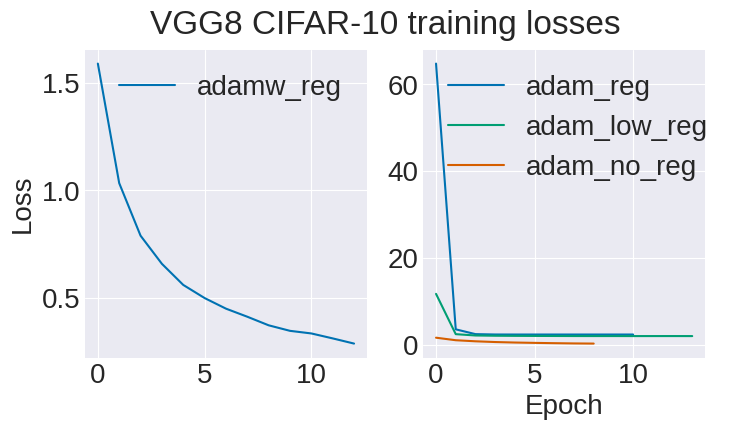

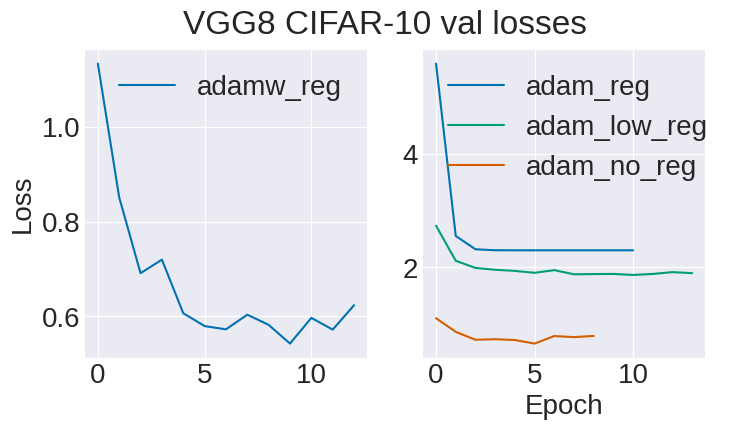

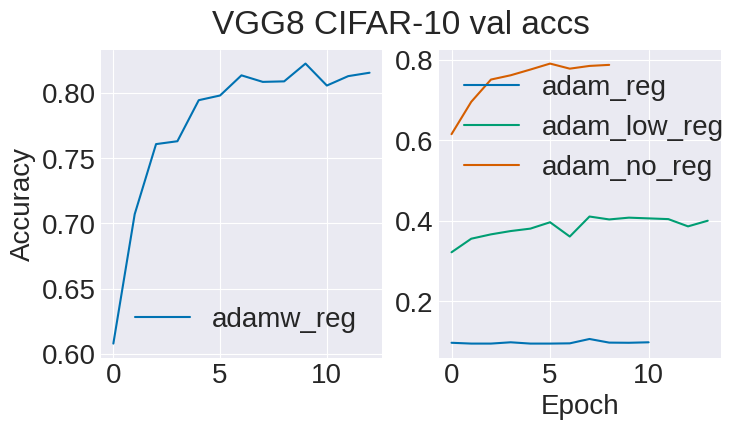

Test accuracies:

adam_reg: 10.00%
adamw_reg: 80.64%
adam_low_reg: 38.53%
adam_no_reg: 77.74%


In [33]:
def plot_hist_optimizer_exp(adamw_hist, adam_hists, adam_labels=['adam_reg', 'adam_low_reg', 'adam_no_reg'],
                            title='',
                            ylabel=''):
    '''Plots either the training loss history, val loss history, or val acc history for the nets trained with adam and
    adamw.
    This plotting function is provided to you. Feel free to modify to suit your needs.
    Parameters:
    -----------
    adamw_hist: array-like. len(hist_nodropout)=E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the net trained with Adam.
    adam_hists: list of lists. len(hists)=3. len(sublists) = E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the 3 networks.
    labels: list of str.
        The labels/order of conditions in adam_hists. Modify if your order does not match the default.
    title: str.
        A useful title.
    ylabel: str.
        A useful y label.
    '''
    fig, axes = plt.subplots(ncols=2, figsize=(8,4))
    axes[0].plot(adamw_hist, label='adamw_reg')
    for i in range(len(adam_labels)):
        axes[1].plot(adam_hists[i], label=adam_labels[i])
    axes[0].legend()
    axes[1].legend()
    fig.suptitle(title)
    axes[0].set_ylabel(ylabel)
    axes[1].set_xlabel('Epoch')
    plt.show()

# Labels map to our model_params:
# [(0.6, "adam"), (0.6, "adamW"), (0.06, "adam"), (0.0, "adam")]
# So our order is: adam_reg, adamw_reg, adam_low_reg, adam_no_reg 
# But the plotting function expects adamw_reg first, then the three adam variants

# Extract training losses by model
adamw_train_loss = train_losses[1]  # AdamW with reg=0.6
adam_train_losses = [train_losses[0], train_losses[2], train_losses[3]]  # Adam with reg=0.6, 0.06, 0.0

# Extract validation losses by model
adamw_val_loss = val_losses[1]  # AdamW with reg=0.6
adam_val_losses = [val_losses[0], val_losses[2], val_losses[3]]  # Adam with reg=0.6, 0.06, 0.0

# Extract validation accuracies by model
adamw_val_acc = val_accs[1]  # AdamW with reg=0.6
adam_val_accs = [val_accs[0], val_accs[2], val_accs[3]]  # Adam with reg=0.6, 0.06, 0.0

# Plot the results
plot_hist_optimizer_exp(adamw_train_loss, adam_train_losses, title='VGG8 CIFAR-10 training losses', ylabel='Loss')
plot_hist_optimizer_exp(adamw_val_loss, adam_val_losses, title='VGG8 CIFAR-10 val losses', ylabel='Loss')
plot_hist_optimizer_exp(adamw_val_acc, adam_val_accs, title='VGG8 CIFAR-10 val accs', ylabel='Accuracy')

# Define labels for all models for test accuracy reporting
all_labels = ['adam_reg', 'adamw_reg', 'adam_low_reg', 'adam_no_reg']

# Print test accuracies
print('Test accuracies:')
print()
for i in range(len(all_labels)):
    print(f'{all_labels[i]}: {100*test_accs[i]:.2f}%')

### 7c. Questions

**Question 10:** What effect does regularization have with Adam? When does it perform best/worst? How do you know?

**Question 11:** How does the results with AdamW compare with the nets trained with Adam?

**Answer 10:**

**Answer 11:**

## Task 8: Going even deeper with VGG15

This network is an approximation of the VGG19 network from the VGG paper. This is a big and deep model:
- 5 conv blocks. First two blocks have 2 conv layers, each. The remaining blocks have 3 conv layers each. There is no dropout in any of the conv blocks.
- flatten layer.
- 1 dense block with dropout.
- 1 dense output layer with softmax activation.

In this task, the goal is to implement VGG15 and assess its baseline accuracy on CIFAR-10.

### 8a. Implement and test VGG15

If you copy-paste from VGG8, this should be fast.

In [34]:
from vgg_nets import VGG15

#### Test: `VGG15`

In [35]:
v = VGG15(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0) shape: [1, 4, 4, 512]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_2) shape: [1, 4, 4, 256]
	

The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv0) shape: [1, 2, 2, 512]
ConvBlock4:
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv0) shape: [1, 4, 4, 512]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv2) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 8, 8, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool2) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv0) shape: [1, 16, 16, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool2) shape: [1, 16, 16, 64]
	Conv2D layer output(ConvBlock1/conv1) shape: [1, 32, 32, 64]
	Conv2D layer output(ConvBlock1/conv0) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
```


In [36]:
tf.random.set_seed(0)
v = VGG15(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([3, 32, 32, 3]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.096 0.298 0.203 0.319 0.084]
 [0.089 0.278 0.216 0.33  0.087]
 [0.087 0.277 0.214 0.345 0.078]]''')

Your net_acts are
[[0.096 0.298 0.203 0.319 0.084]
 [0.089 0.278 0.216 0.33  0.087]
 [0.087 0.277 0.214 0.344 0.078]] and should be
[[0.096 0.298 0.203 0.319 0.084]
 [0.089 0.278 0.216 0.33  0.087]
 [0.087 0.277 0.214 0.345 0.078]]


### 8b. Train VGG15 on CIFAR-10

Here is how you should setup training:
1. Train with patience of `4`.
2. Use He initialization.
3. Use AdamW and regularization of `0.6`.

Store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).

**Notes:**
- Set random seed at the beginning for consistency.
- Use `tf.keras.backend.clear_session()` at the beginning to help prevent the memory used from growing.

In [37]:
# Set random seed and clear session
tf.random.set_seed(0)
tf.keras.backend.clear_session()

# Create VGG15 network
model = VGG15(C=10, 
             input_feats_shape=x_train.shape[1:], 
             wt_init="he",
             reg=0.6)  # Use regularization strength of 0.6

# Set loss function and compile model with AdamW optimizer
model.loss_name = 'cross_entropy'
model.compile(loss='cross_entropy', optimizer='adamw', lr=0.001)

print(f"Starting training VGG15 with patience=4...")

# Track training time
start_total = time.time()

# Train the model
train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(
    x_train, y_train, x_val, y_val, patience=4)

total_time = time.time() - start_total

# Evaluate on test set
test_acc, test_loss = model.evaluate(x_test, y_test, batch_sz=128)

# Print summary statistics
print(f"\nTraining completed for VGG15")
print(f"Number of epochs trained: {epochs}")
print(f"Total training time: {total_time:.2f} seconds")
print(f"Average time per epoch: {total_time/epochs:.2f} seconds")
print(f"Final test accuracy: {test_acc:.4f}")
print(f"Final training loss: {train_loss_hist[-1]:.4f}")
print(f"Final validation loss: {val_loss_hist[-1]:.4f}")
print(f"Final validation accuracy: {val_acc_hist[-1]:.4f}")

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0) shape: [1, 4, 4, 512]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_2) shape: [1, 4, 4, 256]


Epoch 1/10000: Train Loss: 2.3118, Val Loss: 2.3030, Val Acc: 0.0972, Time: 14.74s


Epoch 2/10000: Train Loss: 2.3017, Val Loss: 2.3029, Val Acc: 0.0952, Time: 8.01s


Epoch 3/10000: Train Loss: 2.3027, Val Loss: 2.3027, Val Acc: 0.0952, Time: 7.97s


Epoch 4/10000: Train Loss: 2.3027, Val Loss: 2.3026, Val Acc: 0.0984, Time: 7.99s


Epoch 5/10000: Train Loss: 2.3027, Val Loss: 2.3029, Val Acc: 0.0952, Time: 8.01s


Epoch 6/10000: Train Loss: 2.3026, Val Loss: 2.3030, Val Acc: 0.0952, Time: 8.07s


Epoch 7/10000: Train Loss: 2.3026, Val Loss: 2.3029, Val Acc: 0.0958, Time: 8.08s
Finished training after 7 epochs!



Training completed for VGG15
Number of epochs trained: 7
Total training time: 62.88 seconds
Average time per epoch: 8.98 seconds
Final test accuracy: 0.1001
Final training loss: 2.3026
Final validation loss: 2.3029
Final validation accuracy: 0.0958


In the cell below, plot the VGG15 train and validation loss history over epochs. Place the test acc in the title.

### 8c. Questions

**Question 12:** How does the baseline accuracy of VGG15 compare to the best accuracies you achieved with the shallower networks? Did this surprise you?

**Answer 12:**